## Machine learning with Scikit-learn: Classification on this [dataset](https://github.com/hhaji/Applied-Machine-Learning/blob/master/Recitation-Assignments/Assignments_Data/Assignment_Set_8_Data.csv)
by [Zahra Taheri](https://github.com/zata213/Applied_Machine_Learning_S20_Assignments) (2 May 2020)

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

#To make this notebook's output stable across runs
np.random.seed(1)

In [2]:
# 1) Download the dataset by URL and use it directly
#url='https://raw.githubusercontent.com/hhaji/Applied-Machine-Learning/master/Recitation-Assignments/Assignments_Data/Assignment_Set_8_Data.csv'
#data1=pd.read_csv(url)

#Write downloaded dataset to a csv file
#data1.to_csv('assignments-8.csv')

# 2) Read and prepare downloaded data from PC
data2=pd.read_csv('assignments-8.csv')
data=data2.drop(data2.columns[0],axis=1)

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
#Preparing the data
data['test preparation course']=data['test preparation course'].map({'none': 1,'completed': 2})
data['lunch']=data['lunch'].map({'free/reduced': 1,'standard': 2})
data['parental level of education']=data['parental level of education'].map(
    {'some high school':1,'high school':2,'some college':3,"bachelor's degree":4,
     "master's degree":5,"associate's degree":6})
data['race/ethnicity']=data['race/ethnicity'].map(
    {'group A':1,'group B':2,'group C':3,'group D':4,'group E':5})
data['gender']=data['gender'].map({'male': 1,'female': 2})

#Shuffle dataset
data=data.sample(frac=1).reset_index(drop=True)

data.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,1.518000,3.174000,3.348000,1.645000,1.358000,66.08900,69.169000,68.054000
std,0.499926,1.157179,1.773709,0.478753,0.479652,15.16308,14.600192,15.195657
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,17.000000,10.000000
25%,1.000000,2.000000,2.000000,1.000000,1.000000,57.00000,59.000000,57.750000
50%,2.000000,3.000000,3.000000,2.000000,1.000000,66.00000,70.000000,69.000000
75%,2.000000,4.000000,5.000000,2.000000,2.000000,77.00000,79.000000,79.000000
max,2.000000,5.000000,6.000000,2.000000,2.000000,100.00000,100.000000,100.000000


# Following the principle "look at plots of the data first"

#### 1- Multiclass case (2D plots based on two columns of the data, with 'race/ethnicity' as target) 

Text(0.5, 1.0, 'Math score and parental level of education columns')

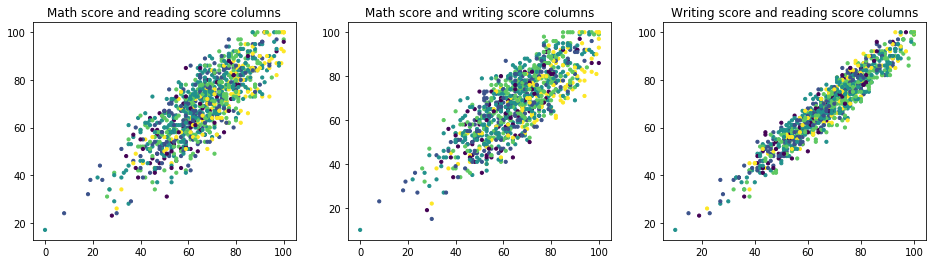

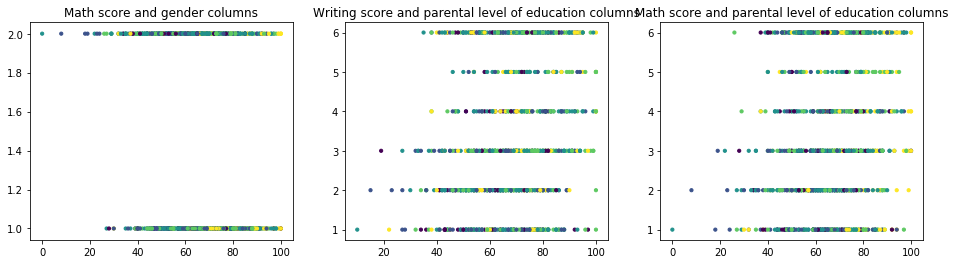

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(16,4))
axes[0].scatter(data['math score'], data['reading score'], s=10, c=data['race/ethnicity'])
axes[0].set_title('Math score and reading score columns')

axes[1].scatter(data['math score'], data['writing score'], s=10, c=data['race/ethnicity'])
axes[1].set_title('Math score and writing score columns')

axes[2].scatter(data['writing score'], data['reading score'], s=10, c=data['race/ethnicity'])
axes[2].set_title('Writing score and reading score columns')


fig, axes = plt.subplots(1, 3, figsize=(16,4))
axes[0].scatter(data['math score'], data['gender'], s=10, c=data['race/ethnicity'])
axes[0].set_title('Math score and gender columns')

axes[1].scatter(data['writing score'], data['parental level of education'], s=10, c=data['race/ethnicity'])
axes[1].set_title('Writing score and parental level of education columns')

axes[2].scatter(data['math score'], data['parental level of education'], s=10, c=data['race/ethnicity'])
axes[2].set_title('Math score and parental level of education columns')

#### 2- Binary case (2D plots based on columns 'Math score' and 'reading score' of the data, with 'race/ethnicity' as target) 

In [7]:
#Function to Change labeling to binary case
def occurence(L,j):
    A=[]
    for i in L:
        if i==j:
            A=A+[True]
        else:
            A=A+[False]
    return A

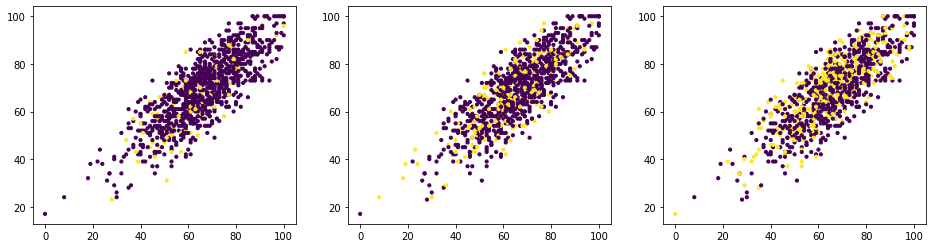

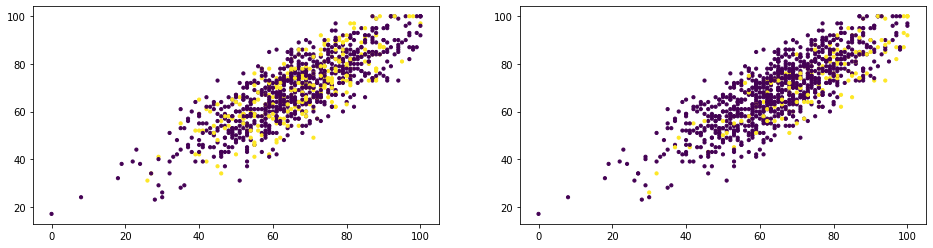

In [8]:
#group A
dt2A=data.copy()
A1A=dt2A['race/ethnicity'].values.tolist()
A2A=occurence(A1A,1)
dt2A['race/ethnicity']=A2A

#group B
dt2B=data.copy()
A1B=dt2B['race/ethnicity'].values.tolist()
A2B=occurence(A1B,2)
dt2B['race/ethnicity']=A2B

#group C
dt2C=data.copy()
A1C=dt2C['race/ethnicity'].values.tolist()
A2C=occurence(A1C,3)
dt2C['race/ethnicity']=A2C

#group D
dt2D=data.copy()
A1D=dt2D['race/ethnicity'].values.tolist()
A2D=occurence(A1D,4)
dt2D['race/ethnicity']=A2D

#group E
dt2E=data.copy()
A1E=dt2E['race/ethnicity'].values.tolist()
A2E=occurence(A1E,5)
dt2E['race/ethnicity']=A2E


fig, axes = plt.subplots(1, 3, figsize=(16,4))
axes[0].scatter(dt2A['math score'], dt2A['reading score'], s=10, c=dt2A['race/ethnicity'])
axes[1].scatter(dt2B['math score'], dt2B['reading score'], s=10, c=dt2B['race/ethnicity'])
axes[2].scatter(dt2C['math score'], dt2C['reading score'], s=10, c=dt2C['race/ethnicity'])

fig, axes = plt.subplots(1, 2, figsize=(16,4))
axes[0].scatter(dt2D['math score'], dt2D['reading score'], s=10, c=dt2D['race/ethnicity'])
axes[1].scatter(dt2E['math score'], dt2E['reading score'], s=10, c=dt2E['race/ethnicity'])

###  <p> Note: <span style="color:red"> Based on above plots, it seems that practically there is no good separation between labels, and so that could indicate lack of predictability. </span><p>

# Classification

In [9]:
data['race/ethnicity'].value_counts()

3    319
4    262
2    190
5    140
1     89
Name: race/ethnicity, dtype: int64

In [10]:
#Split target column from dataset
target=data['race/ethnicity'].values.tolist()
data=data.drop(data.columns[1],axis=1)

dt=data.copy()
y = target
X = dt.values
X

array([[ 1,  4,  1, ..., 55, 59, 54],
       [ 2,  2,  1, ..., 60, 72, 68],
       [ 2,  6,  1, ..., 65, 77, 74],
       ...,
       [ 2,  4,  1, ..., 67, 75, 72],
       [ 1,  6,  2, ..., 80, 75, 77],
       [ 2,  1,  1, ..., 50, 64, 59]], dtype=int64)

In [11]:
#Randomly choose 20% of the dataset as test set

#from numpy.random import default_rng

#rng = default_rng()
#removed_indices=rng.choice(999, size=200, replace=False)
#keep_indices=list(set(range(len(X)))-set(removed_indices))

#X_train=X[keep_indices]
#y_train=[y[i] for i in keep_indices]
#X_test=X[removed_indices]
#y_test=[y[i] for i in removed_indices]
#example=X[removed_indices[100]]

In [12]:
#Choose 20% of the dataset as test set

X_train,X_test,y_train,y_test=X[:800],X[800:],y[:800],y[800:]
example=X[801]

## Binary Classification (based on 'Group C')
**Note:** Binary classification based on other groups can be done similarly by changing group number i in the next cell.

In [13]:
i=3 #Group No., i.e. {A:1, B:2, C:3, D:4, E:5}
y_train_b=occurence(y_train,i)
y_test_b=occurence(y_test,i)
print(y_test_b[1])

False


#### SVM (Support Vector Machine)

In [14]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_b)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
sgd_clf.predict([example])

array([False])

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_b, cv=3, scoring="accuracy")

array([0.66666667, 0.58426966, 0.68421053])

In [17]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_b, cv=3)

In [18]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_b, y_train_pred)

array([[477,  65],
       [219,  39]], dtype=int64)

In [19]:
y_train_perfect_predictions = y_train_b

In [20]:
confusion_matrix(y_train_b, y_train_perfect_predictions)

array([[542,   0],
       [  0, 258]], dtype=int64)

In [21]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_b, y_train_pred)

0.375

In [22]:
recall_score(y_train_b, y_train_pred)

0.1511627906976744

In [23]:
from sklearn.metrics import f1_score
f1_score(y_train_b, y_train_pred)

0.21546961325966849

In [24]:
y_scores = sgd_clf.decision_function([example])
y_scores

array([-1195.0710904])

In [25]:
threshold = -2000
y_example_pred = (y_scores > threshold)

In [26]:
y_example_pred

array([ True])

In [27]:
threshold = 2000
y_example_pred = (y_scores > threshold)
y_example_pred

array([False])

In [28]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_b, cv=3, method="decision_function")
y_scores.shape

(800,)

In [29]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

precisions, recalls, thresholds = precision_recall_curve(y_train_b, y_scores)

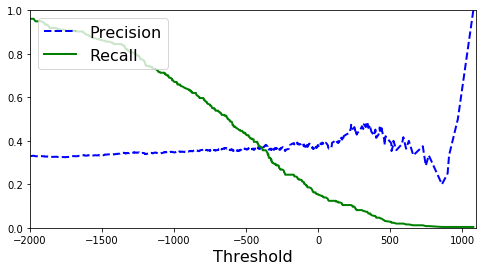

In [30]:
# plot precision-recall vs threshold
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-2000, 1100])
plt.show()

In [31]:
(y_train_pred == (y_scores > 0)).all()

True

In [32]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [33]:
precision_score(y_train_b, y_train_pred_90)

1.0

In [34]:
recall_score(y_train_b, y_train_pred_90)

0.003875968992248062

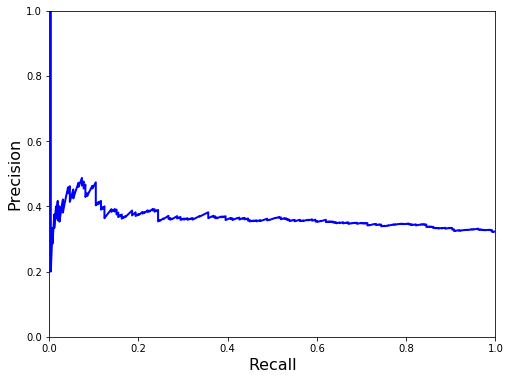

In [35]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0,1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [36]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_b, y_scores)

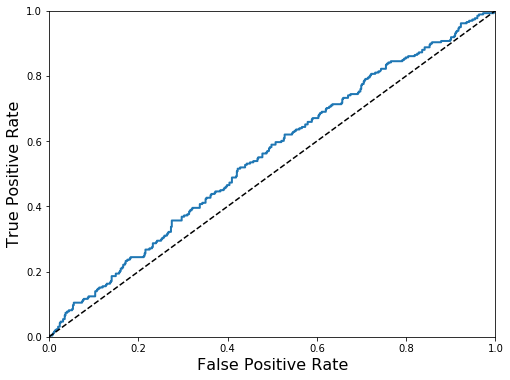

In [37]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [38]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_b, y_scores)

0.5542528390400183

#### LR (Logistic regression)

In [39]:
sgd_clf2=SGDClassifier(loss='log',random_state=42)
sgd_clf2.fit(X_train, y_train_b)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [40]:
sgd_clf2.predict([example])

array([ True])

In [41]:
cross_val_score(sgd_clf2, X_train, y_train_b, cv=3, scoring="accuracy")

array([0.68164794, 0.44569288, 0.32330827])

In [42]:
y_train_pred = cross_val_predict(sgd_clf2, X_train, y_train_b, cv=3)

In [43]:
confusion_matrix(y_train_b, y_train_pred)

array([[234, 308],
       [105, 153]], dtype=int64)

In [44]:
y_train_perfect_predictions = y_train_b

In [45]:
confusion_matrix(y_train_b, y_train_perfect_predictions)

array([[542,   0],
       [  0, 258]], dtype=int64)

In [46]:
precision_score(y_train_b, y_train_pred)

0.3318872017353579

In [47]:
recall_score(y_train_b, y_train_pred)

0.5930232558139535

In [48]:
f1_score(y_train_b, y_train_pred)

0.42559109874826145

#### PPN (Perceptron)

In [49]:
sgd_clf3=SGDClassifier(loss='perceptron',random_state=42)
sgd_clf3.fit(X_train, y_train_b)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='perceptron',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [50]:
sgd_clf3.predict([example])

array([ True])

In [51]:
cross_val_score(sgd_clf3, X_train, y_train_b, cv=3, scoring="accuracy")

array([0.68164794, 0.46067416, 0.67669173])

In [52]:
y_train_pred = cross_val_predict(sgd_clf3, X_train, y_train_b, cv=3)

In [53]:
confusion_matrix(y_train_b, y_train_pred)

array([[419, 123],
       [192,  66]], dtype=int64)

In [54]:
y_train_perfect_predictions = y_train_b

In [55]:
confusion_matrix(y_train_b, y_train_perfect_predictions)

array([[542,   0],
       [  0, 258]], dtype=int64)

#### Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)#set n_estimators=10 to avoid a warning about the fact that its default value will be set to 100 in Scikit-Learn 0.22.
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_b, cv=3, method="predict_proba")
y_probas_forest

array([[0.1, 0.9],
       [0.4, 0.6],
       [0.2, 0.8],
       ...,
       [0.8, 0.2],
       [0.4, 0.6],
       [0.7, 0.3]])

In [57]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_b,y_scores_forest)

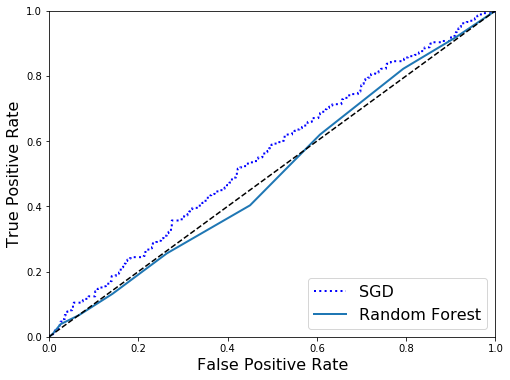

In [58]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [59]:
roc_auc_score(y_train_b, y_scores_forest)

0.4973361652221173

In [60]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_b, cv=3)
precision_score(y_train_b, y_train_pred_forest)

0.3063063063063063

In [61]:
recall_score(y_train_b, y_train_pred_forest)

0.13178294573643412

#### Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=1000,random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train_b)
print(y_test_b[1])
print('prediction:',LR.predict([X_test[1]]))
round(LR.score(X_test,y_test_b), 4)

False
prediction: [False]


0.695

####  (SVM) Support Vector Machines

In [63]:
from sklearn import svm

SVM = svm.LinearSVC(dual=False)
SVM.fit(X_train, y_train_b)
print(y_test_b[1])
print('prediction:',SVM.predict([X_test[1]]))
round(SVM.score(X_test, y_test_b), 4)

False
prediction: [False]


0.69

#### Random Forests

In [64]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(X_train, y_train_b)
print(y_test_b[1])
print('prediction:',RF.predict([X_test[1]]))
round(RF.score(X_test, y_test_b), 4)

False
prediction: [False]


0.695

#### Neural Networks

In [65]:
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
NN.fit(X_train, y_train_b)
print(y_test_b[1])
print('prediction:',NN.predict([X_test[1]]))
round(NN.score(X_test, y_test_b), 4)

False
prediction: [False]


0.695

## Binary Classification after data standardization and normalization (based on 'Group C')

In [66]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_std = std_scale.transform(X)

minmax_scale = preprocessing.MinMaxScaler().fit(X)
X_minmax = minmax_scale.transform(X)

#### Logistic Regression

In [67]:
LR = LogisticRegression(max_iter=1000,random_state=0, solver='lbfgs', multi_class='ovr').fit(X_std[:800],
                                                                                             y_train_b)
print(y_test_b[1])
print('prediction:',LR.predict([X_std[801]]))
round(LR.score(X_std[800:],y_test_b), 4)

False
prediction: [False]


0.69

In [68]:
LR = LogisticRegression(max_iter=1000,random_state=0, solver='lbfgs', multi_class='ovr').fit(X_minmax[:800],
                                                                                             y_train_b)
print(y_test_b[1])
print('prediction:',LR.predict([X_minmax[801]]))
round(LR.score(X_minmax[800:],y_test_b), 4)

False
prediction: [False]


0.695

####  (SVM) Support Vector Machines

In [69]:
SVM = svm.LinearSVC(dual=False) # 'dual=False' to avoid warning
SVM.fit(X_std[:800], y_train_b)
print(y_test_b[1])
print('prediction:',SVM.predict([X_std[801]]))
round(SVM.score(X_std[800:], y_test_b), 4)

False
prediction: [False]


0.69

In [70]:
SVM = svm.LinearSVC(dual=False)
SVM.fit(X_minmax[:800], y_train_b)
print(y_test_b[1])
print('prediction:',SVM.predict([X_minmax[801]]))
round(SVM.score(X_minmax[800:], y_test_b), 4)

False
prediction: [False]


0.695

#### Random Forests

In [71]:
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(X_std[:800], y_train_b)
print(y_test_b[1])
print('prediction:',RF.predict([X_std[801]]))
round(RF.score(X_std[800:], y_test_b), 4)

False
prediction: [False]


0.695

In [72]:
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(X_minmax[:800], y_train_b)
print(y_test_b[1])
print('prediction:',RF.predict([X_minmax[801]]))
round(RF.score(X_minmax[800:], y_test_b), 4)

False
prediction: [False]


0.695

#### Neural Networks

In [73]:
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1,max_iter=2000)
NN.fit(X_std[:800], y_train_b)
print(y_test_b[1])
print('prediction:',NN.predict([X_std[801]]))
round(NN.score(X_std[800:], y_test_b), 4)

False
prediction: [ True]


0.675

In [74]:
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1,max_iter=2000)
NN.fit(X_minmax[:800], y_train_b)
print(y_test_b[1])
print('prediction:',NN.predict([X_minmax[801]]))
round(NN.score(X_minmax[800:], y_test_b), 4)

False
prediction: [False]


0.655

## Multiclass classification

In [75]:
print(y_test[1])

sgd_clf.fit(X_train, y_train)
sgd_clf.predict([example])

4


array([3])

In [76]:
example_scores = sgd_clf.decision_function([example])
example_scores

array([[-1319.71601945,     9.55189046,   360.97785868, -2501.70530318,
        -1344.99513327]])

In [77]:
np.argmax(example_scores)

2

In [78]:
sgd_clf.classes_

array([1, 2, 3, 4, 5])

In [79]:
sgd_clf.classes_[2]

3

In [80]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([example])

array([3])

In [81]:
len(ovo_clf.estimators_)

10

In [82]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([example])

array([3])

In [83]:
forest_clf.predict_proba([example])

array([[0.2, 0.2, 0.6, 0. , 0. ]])

In [84]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.32209738, 0.082397  , 0.2406015 ])

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.31086142, 0.29213483, 0.26315789])

In [86]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[ 0,  6, 25, 26, 12],
       [ 0, 19, 51, 42, 36],
       [ 0, 39, 91, 68, 60],
       [ 0, 26, 69, 84, 29],
       [ 0, 14, 36, 30, 37]], dtype=int64)

In [87]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

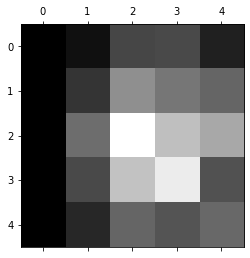

In [88]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
#save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [89]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

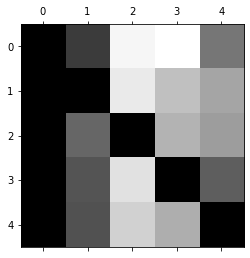

In [90]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
#save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

#### Logistic Regression

In [91]:
LR = LogisticRegression(max_iter=3000,random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train,
                                                                                                     y_train)

LR.predict(X_test)
round(LR.score(X_test,y_test), 4)

0.34

####  (SVM) Support Vector Machines

In [92]:
SVM = svm.SVC(decision_function_shape="ovo")
SVM.fit(X_train, y_train)
SVM.predict(X_test)
round(SVM.score(X_test, y_test), 4)

0.305

#### Random Forests

In [93]:
RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
RF.fit(X_train, y_train)
RF.predict(X_test)
round(RF.score(X_test, y_test), 4)

0.265

#### Neural Networks

In [94]:
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1,max_iter=2000)
NN.fit(X_train, y_train)
NN.predict(X_test)
round(NN.score(X_test, y_test), 4)

0.315

## Multiclass Classification after data standardization and normalization

In [95]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_std = std_scale.transform(X)

minmax_scale = preprocessing.MinMaxScaler().fit(X)
X_minmax = minmax_scale.transform(X)

#### Logistic Regression

In [96]:
LR = LogisticRegression(max_iter=3000,random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_std[:800],
                                                                                             y_train)

LR.predict(X_std[800:])
round(LR.score(X_std[800:],y_test), 4)

0.345

In [97]:
LR2 = LogisticRegression(max_iter=3000,random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_minmax[:800],
                                                                                             y_train)
LR2.predict(X_minmax[800:])
round(LR2.score(X_minmax[800:],y_test), 4)

0.335

####  (SVM) Support Vector Machines

In [98]:
SVM = svm.SVC(decision_function_shape="ovo")
SVM.fit(X_std[:800], y_train)
SVM.predict(X_std[800:])
round(SVM.score(X_std[800:], y_test), 4)

0.315

In [99]:
SVM = svm.SVC(decision_function_shape="ovo")
SVM.fit(X_minmax[:800], y_train)
SVM.predict(X_minmax[800:])
round(SVM.score(X_minmax[800:], y_test), 4)

0.325

#### Random Forests

In [100]:
RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
RF.fit(X_std[:800], y_train)
RF.predict(X_std[800:])
round(RF.score(X_std[800:], y_test), 4)

0.26

In [101]:
RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
RF.fit(X_minmax[:800], y_train)
RF.predict(X_minmax[800:])
round(RF.score(X_minmax[800:], y_test), 4)

0.26

#### Neural Networks

In [102]:
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1,max_iter=2000)
NN.fit(X_std[:800], y_train)
NN.predict(X_std[800:])
round(NN.score(X_std[800:], y_test), 4)

0.22

In [103]:
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1,max_iter=7000)
NN.fit(X_minmax[:800], y_train)
NN.predict(X_minmax[800:])
round(NN.score(X_minmax[800:], y_test), 4)

D:\anaconda3\envs\py38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.235

--------------------------------------------------------------------------

# Extra works:
## Binary Classification based on 'Group A'-Accuracy of SVM

In [104]:
i=1 #Group No., i.e. {A:1, B:2, C:3, D:4, E:5}
y_train_b=occurence(y_train,i)
y_test_b=occurence(y_test,i)
print(y_test_b[1])

False


In [105]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_b)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [106]:
sgd_clf.predict([example])

array([False])

In [107]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_b, cv=3, scoring="accuracy")

array([0.91011236, 0.91385768, 0.91353383])

In [108]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_b, cv=3)

In [109]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_b, y_train_pred)

array([[730,   1],
       [ 69,   0]], dtype=int64)

In [110]:
y_train_perfect_predictions = y_train_b

In [111]:
confusion_matrix(y_train_b, y_train_perfect_predictions)

array([[731,   0],
       [  0,  69]], dtype=int64)

In [112]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_b, y_train_pred)

0.0

In [113]:
recall_score(y_train_b, y_train_pred)

0.0

In [114]:
from sklearn.metrics import f1_score
f1_score(y_train_b, y_train_pred)

0.0

In [115]:
y_scores = sgd_clf.decision_function([example])
y_scores

array([-1931.7342699])

In [116]:
threshold = -2000
y_example_pred = (y_scores > threshold)

In [117]:
y_example_pred

array([ True])

In [118]:
threshold = 2000
y_example_pred = (y_scores > threshold)
y_example_pred

array([False])